# Исследование данных о российском кинопрокате




**Цель:** выявление текущих трендов рынка российского кинопроката.

**Задача:** изучить рынок российского кинопроката, найти взаимосвязи, посмотреть, насколько фильмы с государственной поддержкой интересны зрителю.

Данные были взяты с портала открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Таблица mkrf_movies** содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

title — название фильма;

puNumber — номер прокатного удостоверения;

show_start_date — дата премьеры фильма;

type — тип фильма;

film_studio — студия-производитель;

production_country — страна-производитель;

director — режиссёр;

producer — продюсер;

age_restriction — возрастная категория;

refundable_support — объём возвратных средств государственной поддержки;

nonrefundable_support — объём невозвратных средств государственной поддержки;

financing_source — источник государственного финансирования;

budget — общий бюджет фильма;

ratings — рейтинг фильма на КиноПоиске;

genres — жанр фильма.

Cтолбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.


**Таблица mkrf_shows** содержит сведения о показах фильмов в российских кинотеатрах.

puNumber — номер прокатного удостоверения;

box_office — сборы в рублях.



**План работы**
1. Знакомство с данными
2. Предобработка данных
3. Исследовательский анализ данных
4. Выводы

In [310]:
#импортируем нужные библиотеки для работы
import pandas as pd
import matplotlib.pyplot as plt
import warnings

## Знакомство с данными

In [311]:
#откроем первый файл
data_movies = pd.read_csv('./mkrf_movies.csv', sep = ',')
data_movies.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [312]:
#получим информацию о первом файле
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [313]:
#изменим отсутсвующие значения в puNumber
data_movies['puNumber'] = data_movies['puNumber'].replace('нет', 0)

#изменим тип данных на целочисленный
data_movies['puNumber'] = data_movies['puNumber'].astype('int')

In [314]:
#откроем второй файл
data_shows = pd.read_csv('./mkrf_shows.csv', sep = ',')
data_shows.head(15)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


In [315]:
#объединим файлы
data = data_movies.merge(data_shows, how='left')

## Предобработка данных

### Явные дубликаты

In [316]:
#проверим на явные дубликаты
data.duplicated().sum()

0

In [317]:
data['title'].duplicated().sum()

714

In [318]:
duplicatetitle =  data[data.duplicated(['title'])]
duplicatetitle

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09T12:00:00.000Z,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23T12:00:00.000Z,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",759526.00
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23T12:00:00.000Z,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный",1125302.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07T12:00:00.000Z,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13T12:00:00.000Z,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05T12:00:00.000Z,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09T12:00:00.000Z,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


Скорее всего были разные прокатные удостоверения у одного и того же фильма, поэтому так много дубликатов в столбце с названием. Полных дублей нет

In [319]:
#посмотрим дубликаты в puNumber
data['puNumber'].duplicated().sum()

2

In [320]:
duplicatepuNumber = data[data.duplicated(['puNumber'])]
duplicatepuNumber

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Странно, скорее всего в каком-то из этих фильмов ошиблись в puNumber. Заменим эти значения на 0, все равно у этих фильмов неизвестны значения box_office, ничего не потеряем

In [321]:
data['puNumber'] = data['puNumber'].replace('221054410.0', 0)

### Столбцы, в которых нужно изменить тип данных:

**show_start_date**

**age_restriction**

**ratings**


In [322]:
#переведём в формат времени
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%dT%H:%M:%S')

#посмотрим уникальные значения
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [323]:
#заменим иной формат оценки в привычный
data['ratings'] = data['ratings'].replace('99%', 9.9)
data['ratings'] = data['ratings'].replace('28%', 2.8)
data['ratings'] = data['ratings'].replace('97%', 9.7)
data['ratings'] = data['ratings'].replace('83%', 8.3)
data['ratings'] = data['ratings'].replace('64%', 6.4)
data['ratings'] = data['ratings'].replace('91%', 9.1)
data['ratings'] = data['ratings'].replace('94%', 9.4)
data['ratings'] = data['ratings'].replace('62%', 6.2)
data['ratings'] = data['ratings'].replace('79%', 7.9)
data['ratings'] = data['ratings'].replace('90%', 9.0)
data['ratings'] = data['ratings'].replace('19%', 1.9)
data['ratings'] = data['ratings'].replace('88%', 8.8)
data['ratings'] = data['ratings'].replace('89%', 8.9)
data['ratings'] = data['ratings'].replace('98%', 9.8)


In [324]:
#изменим тип данных на вещественный
data['ratings'] = data['ratings'].astype(float)

#посмотрим значения в столбце age_restriction
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [325]:
#изменим значения в столбце age_restriction с помощью функции на челочисленные
def correct_age_restriction(i):
    if '«18+»' in i:
        i = 18
    elif '«12+»'  in i:
        i = 12
    elif '«6+»'  in i:
        i = 6
    elif '«16+»'  in i:
        i = 16
    elif '«0+»'  in i:
        i = 0
    return i
data['age_restriction'] = data['age_restriction'].apply(correct_age_restriction)

### Столбцы, в которых нужно обработать категориальные значения:

**type**

**production_country**

In [326]:
#посмотрим уникальные значения
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [327]:
#проверим сколько значений 
len(data['production_country'].unique())

951

In [328]:
#удаление пробелов в начале и конце строки
data['type'] = data['type'].str.strip()


#удаление пробелов в начале и конце строки, нижний регистр
data['production_country'] = data['production_country'].str.lower()
data['production_country'] = data['production_country'].str.strip()

In [329]:
data['production_country'] = data['production_country'].str.replace('-', ',')
data['production_country'] = data['production_country'].str.replace(',', ', ')
data['production_country'] = data['production_country'].str.replace(' ,', ',')

#проверим сколько значений после обработки
len(data['production_country'].unique())

890

### Пропуски

In [330]:
#проверим количество пропусков в процентах
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


**Пропуски содержатся в таких колонках как:**

**producer — продюсер**. Скорее всего такие пропуски не получится заполнить, продюсера могло и не быть или он может быть не указан. Также вероятна ошибка при выгрузке данных или другие тенхнические причины.

**refundable_support	— объём возвратных средств государственной поддержки.** Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. Пропуски не сможем заполнить аналогично budget.

**nonrefundable_support — объём невозвратных средств государственной поддержки.** Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. Пропуски не сможем заполнить аналогично budget.

**budget — общий бюджет фильма.** Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. Пропуски не сможем заполнить.

**financing_source  — источник государственного финансирования.** Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. Пропуски не сможем заполнить аналогично  budget.


**ratings — рейтинг фильма на КиноПоиске.** Скорее всего такие пропуски не получится заполнить, потому что в выгрузку могли попать фильмы без рейтинга или значение могло потеряться при выгрузке. Также рейтинг указан на кинопоиске, а фильмы с пропусками в рейтинге могли идти в кинотеатрах.

**genres — жанр фильма.** Скорее всего такие пропуски не получится заполнить, жанр может быть не указан или неизвестен. Также вероятна ошибка при выгрузке данных или другие тенхнические причины.

**box_office** — сборы в рублях. Данные невозможно получить из каких-либо других столбцов или взять среднее по другим фильмам, поэтому невозможно заполнить пропуски. Вероятно, такие данные просто не были указаны или потерялись при выгрузке.


In [331]:
#проверка, что данные в столбце financing_source указаны только для тех фильмов, которые получили государственную поддержку.
data.loc[data['budget'].isna(), 'financing_source'].unique()

array([nan], dtype=object)

In [332]:
#проверка, что данные в столбце refundable_support указаны только для тех фильмов, которые получили государственную поддержку.
data.loc[data['budget'].isna(), 'refundable_support'].unique()

array([nan])

In [333]:
#проверка, что данные в столбце nonrefundable_support указаны только для тех фильмов, которые получили государственную поддержку.
data.loc[data['budget'].isna(), 'nonrefundable_support'].unique()

array([nan])

### Посмотрим выбросы в количественных столбцах

**puNumber**. Значения 0 оставляем, это отсутсвующие, но остальные должны быть с 9 цифрами до запятой

**refundable_support**

**nonrefundable_support**

**budget**

**box_office**

In [334]:
print(data['puNumber'].max())

print(data[data['puNumber'] != 0]['puNumber'].min())

data[data['puNumber'] <111000000.0]

231001111
1811096


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),0,2014-05-15 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",россия,С.Юзеев,М.Галицкая,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4701,1001 рецепт влюбленного кулинара,1811096,2010-12-23 12:00:00+00:00,Художественный,"Ле Фильм дю Риваж, Ля Сет Синема, Адам и Ева, ...","франция, грузия, германия, россия, украина, бе...",Н.Джорджадзе,NaN,0,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN


180.0
0.0


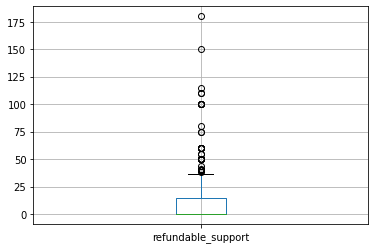

In [335]:
#удалим значение puNumber 1811096.0, там моги потерять знаки
data['puNumber'] = data['puNumber'].replace(1811096.0, 0)

#переведем порядок денег, переведем в млн
data['refundable_support'] = data['refundable_support']/1000000
data['nonrefundable_support'] = data['nonrefundable_support']/1000000
data['budget'] = data['budget']/1000000
data['box_office'] = data['box_office']/1000000

#проверим refundable_support
print(data['refundable_support'].max())

print(data['refundable_support'].min())

data.boxplot('refundable_support')
plt.show()

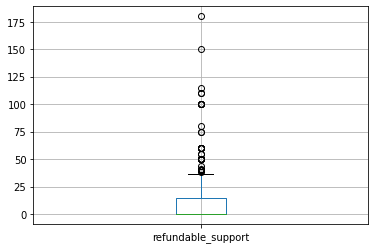

In [336]:
data.boxplot('refundable_support')
plt.show()

In [337]:
data[data['refundable_support'] > 70]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3164,Герой (2015),111000416,2016-01-22 12:00:00+00:00,Художественный,"ООО ""Студия 25"", ООО ""Медиа Арт Студио"", ООО ...",россия,Ю.Васильев,"Э.Айнулова, Н.Дорошкевич, М.Журомская",12,110.0,30.0,222.177790,"Министерство культуры, Фонд кино",7.1,"мюзикл,боевик,драма",81.430627
3255,Время первых (2017),111001317,2017-02-21 12:00:00+00:00,Художественный,"ООО ""ТаББаК"", ООО ""Студия Третий Рим""",россия,Д.Киселев,"Т.Бекмамбетов, Е.Миронов",6,75.0,175.0,528.441977,Фонд кино,7.5,"приключения,триллер,биография",544.332260
3351,Дуэлянт,111015416,2016-09-14 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",16,150.0,300.0,684.200536,Фонд кино,6.6,драма,364.285140
3453,Ледокол,111016316,2016-10-11 12:00:00+00:00,Художественный,"ООО ""Продюсерская фирма Игоря Толстунова""",россия,Н.Хомерики,"И.Толстунов, С.Козлов",12,100.0,200.0,430.000000,Фонд кино,6.5,драма,337.069663
5437,Матильда,111005717,2017-08-17 12:00:00+00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",16,110.0,190.0,1032.905957,Фонд кино,7.7,"фэнтези,комедия,семейный",511.775548
5569,Легенда о Коловрате,111007617,2017-11-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ИВАН""",россия,И.Шурховецкий,"ООО ""Централ Партнершип"", АО ""Тел...",12,100.0,250.0,500.012729,Фонд кино,6.4,"история,боевик,фэнтези",590.405065
6472,Три богатыря и наследница престола,114008818,2018-12-15 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",россия,К.Бронзит,"С.Сельянов, А.Боярский",6,115.0,0.0,185.500705,Фонд кино,6.5,"мультфильм,приключения,семейный",577.368853
6509,Ёлки Последние,111023918,2018-12-10 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",россия,"Т.Бекмамбетов, А.Першин (псевдоним Ж.Крыжовник...","Т.Бекмамбетов, Г.Стрижевская",6,75.0,25.0,179.708770,Фонд кино,6.9,комедия,701.507030
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...","россия, китай",О.Степченко,"С.Сельянов, А.Петрухин",6,180.0,90.0,2305.074303,Фонд кино,5.8,"приключения,фэнтези",333.597060
7453,Фиксики против кработов,114004819,2019-12-21 12:00:00+00:00,Анимационный,"АО ""Аэроплан""",россия,"В.Бедошвили, О.Ужинов, И.Пшонкин, Д.Цыбулькин","Г.Васильев, С.Саркисов, И.Попов",6,80.0,40.0,270.000000,Фонд кино,7.5,"мультфильм,детский,приключения",387.590522


Разногласий не вижу, вряд ли это выбросы.

400.0
0.0


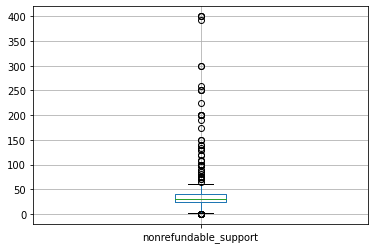

In [338]:
#проверим nonrefundable_support
print(data['nonrefundable_support'].max())

print(data['nonrefundable_support'].min())

data.boxplot('nonrefundable_support')
plt.show()

In [339]:
data[data['nonrefundable_support'] > 350]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2920,Экипаж .,111005416,2016-03-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",6,50.0,392.104482,635.283867,Фонд кино,7.6,"драма,триллер,приключения",1402.255390
5653,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",6,0.0,400.000000,590.192191,Фонд кино,7.5,"спорт,драма",2779.686144
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",россия,А.Кравчук,"А.Максимов, К.Эрнст",12,100.0,400.000000,980.000000,Фонд кино,6.0,"история,биография,драма",717.703186
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",12,100.0,400.000000,944.000000,Фонд кино,5.7,"фантастика,боевик",NaN


Разногласий не вижу, вряд ли это выбросы.

2305.074303
0.0


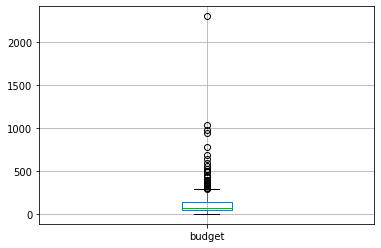

In [340]:
#проверим budget
print(data['budget'].max())

print(data['budget'].min())

data.boxplot('budget')
plt.show()

In [341]:
data[data['budget'] > 2000]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...","россия, китай",О.Степченко,"С.Сельянов, А.Петрухин",6,180.0,90.0,2305.074303,Фонд кино,5.8,"приключения,фэнтези",333.59706


Это значение сильно выбивается, скорее всего оно неверное. Удалим его

In [342]:
data['budget'] = data['budget'].replace(2305.074303, 0)

3073.56869079
0.0


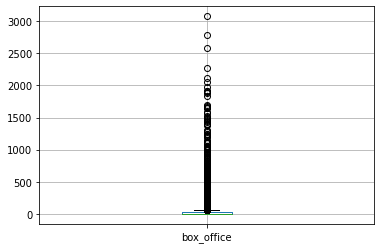

In [343]:
#проверим box_office
print(data['box_office'].max())

print(data['box_office'].min())

data.boxplot('box_office')
plt.show()

In [344]:
data[data['box_office'] > 2500]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5653,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",6,0.0,400.0,590.192191,Фонд кино,7.5,"спорт,драма",2779.686144
6820,Мстители: Финал,121005519,2019-04-29 12:00:00+00:00,Художественный,Марвел Студиос,сша,"Джо Руссо, Энтони Руссо",Кевин Фейги,16,NaN,NaN,NaN,NaN,7.6,"фантастика,боевик,драма",2576.613777
7456,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",12,25.0,35.0,160.000000,Фонд кино,6.8,комедия,3073.568691


Данные вполне реальны. Выбросов нет.

Проверим, может ли сумма возвратной и невозвратной поддержек быть больше бюджета

In [345]:
#создадим столбец с общей суммой поддержки
data['support'] = data['refundable_support'] + data['nonrefundable_support']


In [346]:
#выведем строки с суммой возвратной и невозвратной поддержек больше бюджета

#создадим столбец с общей суммой поддержки
data[data['box_office'] < data['support']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16,0.0,26.500000,79.411900,Министерство культуры,8.1,"драма,мелодрама",0.365354,26.500000
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",россия,А.Якимчук,А.Тютрюмов,12,0.0,26.000000,37.142857,Министерство культуры,NaN,NaN,0.028140,26.000000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12,0.0,107.847945,176.023490,Фонд кино,5.3,"комедия,фантастика",19.957031,107.847945
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16,0.0,28.000000,40.574140,Министерство культуры,4.2,драма,0.055918,28.000000
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",россия,М.Угаров,"А.Миндадзе, Л.Антонова",16,0.0,25.000000,40.015122,Министерство культуры,6.4,драма,0.232100,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7253,Волшебник,111016219,2019-10-03 12:00:00+00:00,Художественный,"ООО ""Медиа Юниверсал""",россия,М.Морсков,"Б.Анисимов, И.Магомедов, В.Маслов",12,0.0,25.000000,40.000000,Министерство культуры,7.1,"фэнтези,драма,детектив",13.848462,25.000000
7290,Урфин Джюс возвращается,114004019,2019-10-14 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",россия,Ф.Дмитриев,"С.Сельянов, А.Боярский",6,0.0,200.000000,300.000000,Фонд кино,6.2,"мультфильм,детский",68.549523,200.000000
7320,Новогодний ремонт,111018219,2019-11-07 12:00:00+00:00,Художественный,"ООО ""ВитЭл""",россия,А.Пинхасов,"Е.Михайлова, В.Галыгин, В.Колесник, А.Седых, Г...",12,0.0,20.000000,30.448911,Министерство культуры,5.6,"комедия,мелодрама",3.591456,20.000000
7322,Успех,111018519,2019-11-04 12:00:00+00:00,Художественный,"ООО ""Кинодом""",россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",12,5.0,20.000000,75.000000,Фонд кино,7.8,драма,3.181218,25.000000


200 фильмов, где деньги куда-то делись

### Добавление новых столбцов

In [347]:
#создадим отдельный столбец только с годами
data['only_year'] = data['show_start_date'].dt.year

#функция для разделения 
def get_first_value_func(i):
    try:
        i = i.split(',')
        i = i[0]
    except:
        pass
    return i
    
#создадим столбец с именем и фамилией главного режиссёра. В столбцы войдут первые значения
data['name_director'] = data['director'].apply(get_first_value_func)

#создадим столбец с основным жанром фильма. В столбцы войдут первые значения
data['one_genre'] = data['genres'].apply(get_first_value_func)

#создадим столбец с долей государственной поддержки от общего бюджета фильма
data['proportion_support'] = (data['refundable_support'] + data['nonrefundable_support'])/data['budget']

## Исследовательский анализ данных

###  Посмотрим, сколько фильмов выходило в прокат каждый год



In [348]:
#сгруппируем по годам и посчитаем количество фильмов
data.pivot_table(index='only_year', values='puNumber', aggfunc='count')

,puNumber
only_year,
2010,985
2011,622
2012,593
2013,630
2014,807
2015,705
2016,818
2017,505
2018,891


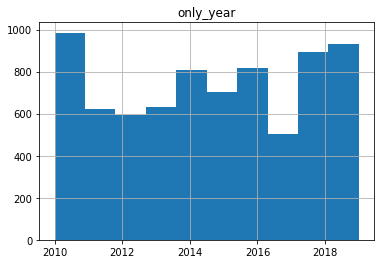

In [349]:
#построим гистограмму
data.hist('only_year', bins = 10)
plt.show()

In [350]:
#дата только с известным прокатом
data_kinoteatr = data.query('box_office>0')

#сгруппируем по годам и посчитаем количество фильмов c известным прокатом
data_kinoteatr.pivot_table(index='only_year', values='puNumber', aggfunc='count')

,puNumber
only_year,
2010,101
2011,109
2012,123
2013,179
2014,273
2015,462
2016,525
2017,357
2018,475


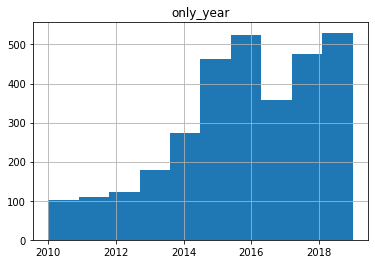

In [351]:
#построим гистограмму
data_kinoteatr.hist('only_year', bins = 10)
plt.show()

In [352]:
#создадим датафрейм с годами и количеством фильмов всего и с известным прокатом
count_films_of_year = pd.DataFrame({
    'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'count_all': [985, 622,593, 630, 807, 705, 818, 505, 891, 930],
    'count': [101, 109,123,179,273,462,525,357, 475, 530]
        })

#создадим столбец с долей
count_films_of_year['proportion'] = count_films_of_year['count']/count_films_of_year['count_all']

count_films_of_year

,year,count_all,count,proportion
0,2010,985,101,0.102538
1,2011,622,109,0.175241
2,2012,593,123,0.207420
3,2013,630,179,0.284127
4,2014,807,273,0.338290
5,2015,705,462,0.655319
6,2016,818,525,0.641809
7,2017,505,357,0.706931
8,2018,891,475,0.533109
9,2019,930,530,0.569892


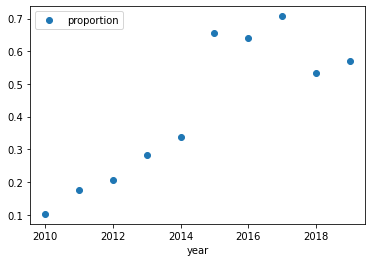

In [353]:
#посмотрим распределение доли по годам
count_films_of_year.plot(x='year', y='proportion', style='o')
plt.show()

Меньше всего фильмов представлено в 2012 году. Больше всего предсталено в 2010 и 2019.

Если говорить о фильмах в российском прокате, то видна тенденция к увеличению доли фильмов с прокатом с годами. Большая доля приходится на 2015-2017 годы. В целом количество фильмов с российским прокатом резко увеличивается в 2015 году.

### Изучим, как менялась динамика проката по годам

             box_office
only_year              
2010           2.428654
2011          14.102765
2012           6.955423
2013          29.799706
2014        7444.951859
2015       39497.365196
2016       47866.299742
2017       48563.707218
2018       49668.403134
2019       48425.708780


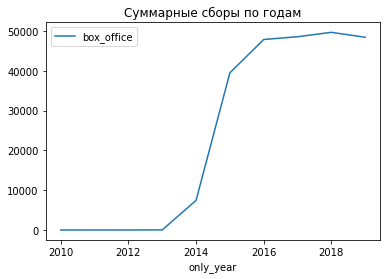

In [354]:
#сгруппируем и найдем суммарные сборы по годам
print(data_kinoteatr.pivot_table(index='only_year', values='box_office', aggfunc='sum'))


#построим график
data_kinoteatr.pivot_table(index='only_year', values='box_office', aggfunc='sum').plot(title='Суммарные сборы по годам')
plt.show()

Очеидно, что сумма сборов в 2010 году была минимальной, а в 2018 году максимальной. Виден сильный рост в сборах, начавшийся в 2013 году, и который вышел на плато после 2016 года.

### Посчитаем среднюю и медианную сумму сборов для каждого года


In [355]:
#сгруппируем по годам и найдем среднее и медиану сборов
data_kinoteatr.pivot_table(index='only_year', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
only_year,,
2010,0.024046,0.001710
2011,0.129383,0.003000
2012,0.056548,0.006220
2013,0.166479,0.003580
2014,27.270886,0.020400
2015,85.492132,5.003450
2016,91.173904,3.915041
2017,136.032793,9.968340


Необходимо учитывать медианное значение сборов, а не среднее, потому что медиана более устойчива к выбросам больших и маленьких значений, показывает наиболее частое значение сборов. Так, например, можно увидеть, что средние сборы в 2014 году были около 27млн, а медианное значение около 0.02млн, что говорит о том, что в 2014 году был какой-то фильм с очень большим кассовым сбором, который как раз повышает среднее значение.

### Определим, влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год

In [356]:
#найдём средние сборы для каждого возрастного ограничения
data_kinoteatr_2010 = data_kinoteatr.query('only_year == 2010')

print(data_kinoteatr_2010.pivot_table(index='age_restriction', values='box_office'))


                 box_office
age_restriction            
0                  0.085800
12                 0.007067
16                 0.006787
18                 0.006798


In [357]:
data_kinoteatr_2011 = data_kinoteatr.query('only_year == 2011')

print(data_kinoteatr_2011.pivot_table(index='age_restriction', values='box_office'))

                 box_office
age_restriction            
0                  0.449996
6                  0.000450
12                 0.009995
16                 0.007065
18                 0.000520


In [358]:
data_kinoteatr_2012 = data_kinoteatr.query('only_year == 2012')

print(data_kinoteatr_2012.pivot_table(index='age_restriction', values='box_office'))

                 box_office
age_restriction            
0                  0.075549
6                  0.071463
12                 0.008364
16                 0.069239
18                 0.010740


In [359]:
data_kinoteatr_2013 = data_kinoteatr.query('only_year == 2013')

print(data_kinoteatr_2013.pivot_table(index='age_restriction', values='box_office'))

                 box_office
age_restriction            
0                  0.073251
6                  0.014390
12                 0.366848
16                 0.014956
18                 0.322578


In [360]:
data_kinoteatr_2014 = data_kinoteatr.query('only_year == 2014')

print(data_kinoteatr_2014.pivot_table(index='age_restriction', values='box_office'))


                 box_office
age_restriction            
0                  9.883217
6                 59.676360
12                31.910893
16                 6.803501
18                49.104728


In [361]:
data_kinoteatr_2015 = data_kinoteatr.query('only_year == 2015')

print(data_kinoteatr_2015.pivot_table(index='age_restriction', values='box_office'))

                 box_office
age_restriction            
0                  9.975120
6                164.184894
12               189.112250
16                68.072580
18                41.153851


In [362]:
data_kinoteatr_2016 = data_kinoteatr.query('only_year == 2016')

print(data_kinoteatr_2016.pivot_table(index='age_restriction', values='box_office'))

                 box_office
age_restriction            
0                  3.664118
6                172.187800
12               148.834714
16                92.069329
18                44.992913


In [363]:
data_kinoteatr_2017 = data_kinoteatr.query('only_year == 2017')

print(data_kinoteatr_2017.pivot_table(index='age_restriction', values='box_office'))

                 box_office
age_restriction            
0                 76.532977
6                268.580937
12               191.498236
16               154.917710
18                65.656433


In [364]:
data_kinoteatr_2018 = data_kinoteatr.query('only_year == 2018')

print(data_kinoteatr_2018.pivot_table(index='age_restriction', values='box_office'))

                 box_office
age_restriction            
0                  6.489800
6                148.602568
12               212.944652
16               105.792323
18                48.939025


In [365]:
data_kinoteatr_2019 = data_kinoteatr.query('only_year == 2019')

print(data_kinoteatr_2019.pivot_table(index='age_restriction', values='box_office'))

                 box_office
age_restriction            
0                  5.915356
6                158.673440
12               149.178809
16                71.648421
18                55.310362


In [366]:
#создадим датафрейм
box_office_age_from_year = pd.DataFrame({
    #'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'box_office_0': [ 0.085801, 0.449996, 0.075549, 0.073251, 9.883217,9.975120,3.664118, 76.532977,6.489800, 5.915356  ],
     })

box_office_age_from_year['box_office_6'] = [ 0.00000, 0.000450, 0.071463,0.014390, 59.676360, 164.184894, 172.187800, 268.580937,148.602568,158.673440 ]
box_office_age_from_year['box_office_12'] = [0.007067, 0.009995, 0.008364, 0.366848, 31.910893, 189.112250, 148.834714,191.498236, 212.944652, 149.178809]
box_office_age_from_year['box_office_16'] = [0.006787, 0.007065, 0.069239, 0.014956, 6.803501,68.072580,92.069329,154.917710,105.792323,71.648421 ]
box_office_age_from_year['box_office_18'] = [0.006798,0.000520,0.010740, 0.322578, 49.104728, 41.153851,44.992913, 65.656433, 48.939025, 55.310362]


box_office_age_from_year

,box_office_0,box_office_6,box_office_12,box_office_16,box_office_18
0,0.085801,0.000000,0.007067,0.006787,0.006798
1,0.449996,0.000450,0.009995,0.007065,0.000520
2,0.075549,0.071463,0.008364,0.069239,0.010740
3,0.073251,0.014390,0.366848,0.014956,0.322578
4,9.883217,59.676360,31.910893,6.803501,49.104728
5,9.975120,164.184894,189.112250,68.072580,41.153851
6,3.664118,172.187800,148.834714,92.069329,44.992913
7,76.532977,268.580937,191.498236,154.917710,65.656433
8,6.489800,148.602568,212.944652,105.792323,48.939025
9,5.915356,158.673440,149.178809,71.648421,55.310362


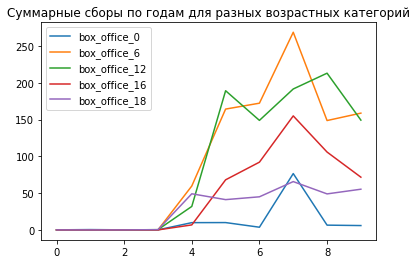

In [367]:
box_office_age_from_year.plot(title='Суммарные сборы по годам для разных возрастных категорий')
plt.show()

По графику можно сделать следующие выводы: В 2010-2013 годах общие сборы по всем категориям были на одном уровне, в 2010 году атегория 6+ отсутсвовала вовсе. Начиная с 2013 года пошел рост и в 2014 году наибольшие сборы собрала категория 6+ с небольшим отрывом от 18+. Категории 16+ и 0+ собрали меньше всего. В 2015-2016 годах больше всего собрали категории 12+ и 6+, хуже всего собрали категории 18+ и 0+. В 2017 году с большим отрывом большую часть сборов собрала категория 6+, потом 12+, 16+. Наименьшую часть собрали категории 0+ и 18+. В 2018 году больше всего собрали категории 12+,6+, потом 16+. Меньше всего - 18+ и 0+.

Скорее всего увеличение графика после 2013 года связано с увеличением количества выборки, то есть с увеличением количества анализируемых фильмов. Самые собирающие категории - 6+, 12+, а также 16+ связаны с тем, что они захватывают большую аудиторию, способную и имеющую время ходить в кинотеатры. Также скорее всего таких фильмов большинство, потому что в таких фильмах не слишком много жестоких или наоборот детских моментов, поэтому они могут захватывать большую часть зрителей. Категории 0+ и 18+ либо слишком детские, либо с жестокостью или другими специфическими моментами, что интересно не всем зрителям.

### Проверим фильмы, которые получили государственную поддержку


In [368]:
warnings.filterwarnings("ignore")

data_source = data[data['refundable_support']>0] #фильмы с гос поддержкой

#создадим столбец с общей суммой поддержки
data_source['support'] = data_source['refundable_support'] + data_source['nonrefundable_support']
data_source['support'] = data_source['support']


#найдём медину общей суммы поддержки
print(data_source['support'].median())

60.0


В среднем объём государственной поддержки фильма - 60 млн.

In [369]:
#отберём провальные фильмы, таких фильмов 235
data_proval = data_source[data_source['budget'] > data_source['box_office']]

#сгруппируем фильмы по financing_source и посмотрим их количество
data_proval.pivot_table(index='financing_source', values='puNumber', aggfunc='count')

,puNumber
financing_source,
"Министерство культуры, Фонд кино",14
Фонд кино,49


In [370]:
#посмотрим, сколько всего у финансирующих предприятий фильмов
data_source.pivot_table(index='financing_source', values='puNumber', aggfunc='count')

,puNumber
financing_source,
"Министерство культуры, Фонд кино",14
Фонд кино,97


У фильмов, финансируемых министерством культуры и фондом кино 14/14 = 100% провальных фильмов У фильмов, финансируемых фондом кино 50/97 = 52% провальных фильмов

In [371]:
#посмотрим распределение провальных фильмов по годам
data_proval.pivot_table(index='only_year', values='puNumber', aggfunc='count')

,puNumber
only_year,
2014,1
2015,15
2016,19
2017,11
2018,7
2019,10


In [372]:
#посмотрим распределение по годам, сколько всего фильмов с гос поддержкой
data_source.pivot_table(index='only_year', values='puNumber', aggfunc='count')

,puNumber
only_year,
2014,3
2015,26
2016,25
2017,21
2018,18
2019,18


Гос поддержка началась с 2014 года В 2014 году было 1/3 = 33% В 2015 году было 15/26 = 58% В 2016 году было 19/25 = 76% В 2017 году было 11/21 = 52% В 2018 году было 7/18 = 39% В 2019 году было 11/18 = 61%

Больший процент провальных фильмов был в 2016 году. Их процент составил 76%.

In [373]:
#отберём успешные фильмы
data_success = data_source[data_source['budget'] < data_source['box_office']] #таких фильмов 83 штуки


data_success.pivot_table(index='financing_source', values='puNumber', aggfunc='count')



,puNumber
financing_source,
Фонд кино,46


У фильмов, финансируемых фондом кино 45/97 = 48% успешных фильмов

In [374]:
#посмотрим распределение успешных фильмов по годам
data_success.pivot_table(index='only_year', values='puNumber', aggfunc='count')

,puNumber
only_year,
2014,2
2015,11
2016,6
2017,10
2018,11
2019,6


В 2014 году было 2/3 = 66% успешных фильмов В 2015 году было 11/26 = 42% успешных фильмов В 2016 году было 6/25 = 24% успешных фильмов В 2017 году было 10/21 = 48% успешных фильмов В 2018 году было 11/18 = 61% успешных фильмов В 2019 году было 5/18 = 28% успешных фильмов

In [375]:
#посмотрим рейтинг финансируемых государством фильмов по годам
data_source.pivot_table(index='only_year', values='ratings', aggfunc='median')

,ratings
only_year,
2014,5.0
2015,6.0
2016,5.8
2017,6.2
2018,5.8
2019,6.0


In [376]:
#посмотрим рейтинг провальных фильмов по годам
data_proval.pivot_table(index='only_year', values='ratings', aggfunc='median')


,ratings
only_year,
2014,3.8
2015,5.9
2016,5.8
2017,6.2
2018,5.9
2019,6.0


In [377]:
#посмотрим рейтинг успешных фильмов по годам
data_success.pivot_table(index='only_year', values='ratings', aggfunc='median')

,ratings
only_year,
2014,5.75
2015,6.20
2016,5.35
2017,5.90
2018,5.50
2019,6.45


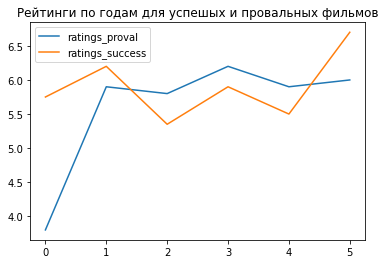

In [378]:
#создадим датафрейм
ratings_from_year = pd.DataFrame({
    #'year': [ 2014, 2015, 2016, 2017, 2018, 2019],
    #'ratings_source': [5.0, 6.0, 5.8, 6.2, 5.8, 6.0],
    'ratings_proval': [3.8, 5.9, 5.8, 6.2, 5.9, 6.0],
    'ratings_success': [ 5.75, 6.20, 5.35, 5.90, 5.50, 6.70]
     })
ratings_from_year.plot(title='Рейтинги по годам для успешых и провальных фильмов')
plt.show()

Удивительно, но средний рейтинг успешных фильмов в 2016, 2017, 2018 годах ниже, чем у провальных, но в 2014, 2015 и 2019 годах наоборот. Однако и успешные, и провальные фильмы имеют оценки меньше 7, что само по себе мало.

In [379]:
#посмотрим у каких режиссеров больше всего окупившихся фильмов
data_success['director'].value_counts().head(10)

Д.Дьяченко                               4
С.Подгаевский                            2
А.Пиманов                                1
К.Феоктистов                             1
К.Бронзит                                1
А.Федотов                                1
Максим Свешников                         1
Д.Чернов                                 1
Л.Марголин, С.Андреасян, М.Жерневский    1
Н.Лопато, В.Ровенский                    1
Name: director, dtype: int64

Самые окупившиеся фильмы у Д.Дьяченко(4 фильма) и  С.Подгаевского(2 фильма)

In [380]:
#посмотрим у каких студий больше всего окупившихся фильмов
data_success['film_studio'].value_counts().head(9)

ООО "ЛИЦЕНЗИОННЫЕ БРЕНДЫ"                    3
ООО "ТаББаК"                                 3
ООО "Студия анимационного кино "Мельница"    3
ООО "Ол Медиа Компани"                       2
АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"    2
ООО "Форс Медиа"                             1
ООО "Смешарики"                              1
 ООО "ТаББаК"                                1
ООО "Кинодом"                                1
Name: film_studio, dtype: int64

Больше всего окупившихся фильмов было снято в следующих студиях:

ООО "ЛИЦЕНЗИОННЫЕ БРЕНДЫ"                    3
ООО "ТаББаК"                                 3
ООО "Студия анимационного кино "Мельница"    3
ООО "Ол Медиа Компани"                       2
АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"    2

In [381]:
#найдем с каких денег начинаются 25% самых дорогих фильмов
data_source['support'].describe()

count    111.000000
mean      95.333591
std       96.617924
min       20.000000
25%       40.000000
50%       60.000000
75%      110.000000
max      500.000000
Name: support, dtype: float64

In [382]:
#создадим отдельный дф с самыми финансируемыми фильмами
data_finance = data_source[data_source['support'] >= 0.000110]

In [383]:
#найдем среднюю поддержку
data_finance['support'].median()

60.0

In [384]:
#найдем средний рейтинг самых финансируемых фильмов
data_finance['ratings'].median()

5.95

In [385]:
#найдем min max рейтинг самых финансируемых фильмов
print(data_finance['ratings'].min())
print(data_finance['ratings'].max())

2.8
8.5


In [386]:
#посмотрим поддержку финансируемых фильмов по годам
data_finance.pivot_table(index='only_year', values='support', aggfunc='median')

,support
only_year,
2014,56.0
2015,47.0
2016,70.0
2017,50.0
2018,82.5
2019,82.5


In [387]:
#посмотрим рейтинг финансируемых фильмов по годам
data_finance.pivot_table(index='only_year', values='ratings', aggfunc='median')

,ratings
only_year,
2014,5.0
2015,6.0
2016,5.8
2017,6.2
2018,5.8
2019,6.0


К 2018-2019 году гос поддержка стала сильно больше, но рейтинги фильмов остались примерно на той же позиции. Это может быть связано с общим подорожанием и экономическими тенденциями.

In [388]:
#найдем режиссеров самых финансируемых фильмов
data_finance['director'].value_counts().head(10)

Д.Дьяченко                                         4
С.Андреасян                                        2
А.Матисон                                          2
А.Цицилин                                          2
Н.Хомерики                                         2
С.Подгаевский                                      2
Р.Давлетьяров                                      2
П.Руминов                                          2
К.Белевич (псевдоним - Кирилл Астахов), Г.Ильин    1
Д.Штурманова                                       1
Name: director, dtype: int64

В основном самые финансируемые фильмы сняли следющие режиссеры: 

Д.Дьяченко                                         4

С.Андреасян                                        2

А.Матисон                                          2

А.Цицилин                                          2

Н.Хомерики                                         2

С.Подгаевский                                      2

Р.Давлетьяров                                      2

П.Руминов                                          2

In [389]:
#найдем студии самых финансируемых фильмов
data_finance['film_studio'].value_counts().head(15)

ООО "ВИЗАРТ ФИЛЬМ"                                                4
ООО "ТаББаК"                                                      3
ООО "Студия анимационного кино "Мельница"                         3
ООО "ЛИЦЕНЗИОННЫЕ БРЕНДЫ"                                         3
ООО "ТПО "РОК"                                                    2
ООО "Ол Медиа Компани"                                            2
ООО "Продюсерская фирма Игоря Толстунова"                         2
ООО "Кинокомпания "Небо"                                          2
ООО "Кинодом"                                                     2
АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"                         2
ООО "ВВП Альянс"                                                  2
ООО "Студия "ТРИТЭ" Никиты Михалкова"                             1
ООО "Ангел", ООО "Энджой Мувиз", ООО "РЕНОВАЦИО интертейнмент"    1
ООО "Продюсерский центр ИВАН"                                     1
ООО "2Д Целлулоид", ООО "КиТ фильм"             

В основном самые финансируемые фильмы сняли следющие студии:

ООО "ВИЗАРТ ФИЛЬМ"                                                4

ООО "ТаББаК"                                                      3

ООО "Студия анимационного кино "Мельница"                         3

ООО "ЛИЦЕНЗИОННЫЕ БРЕНДЫ"                                         3

ООО "ТПО "РОК"                                                    2

ООО "Ол Медиа Компани"                                            2

ООО "Продюсерская фирма Игоря Толстунова"                         2

ООО "Кинокомпания "Небо"                                          2

ООО "Кинодом"                                                     2

АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"                         2

ООО "ВВП Альянс"                                                  2

In [390]:
#найдем с каких денег начинаются 25% самых дорогих фильмов
data_source['ratings'].describe()

count    108.000000
mean       5.842593
std        1.243991
min        2.800000
25%        5.000000
50%        5.950000
75%        6.700000
max        8.500000
Name: ratings, dtype: float64

In [391]:
data_success_ratings = data_source[data_source['ratings'] >= 6.7]

In [392]:
#посмотрим поддержку финансируемых фильмов по годам
data_success_ratings.pivot_table(index='only_year', values='support', aggfunc='median')

,support
only_year,
2015,50.0
2016,140.0
2017,70.0
2018,60.0
2019,80.0


In [393]:
#посмотрим рейтинг финансируемых фильмов по годам
data_success_ratings.pivot_table(index='only_year', values='ratings', aggfunc='median')

,ratings
only_year,
2015,7.0
2016,7.1
2017,7.5
2018,6.9
2019,7.4


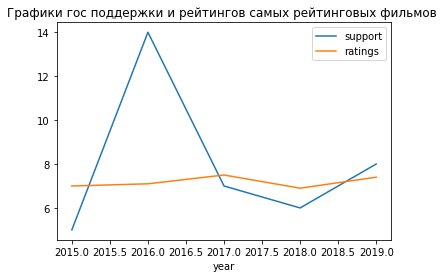

In [394]:

 #создадим датафрейм с годами и количеством фильмов всего и с известным прокатом
success_ratings = pd.DataFrame({
    'year': [2015, 2016, 2017, 2018, 2019],
    'support': [5, 14, 7,6,8],
    'ratings': [7.0, 7.1, 7.5, 6.9, 7.4]
        })

success_ratings.plot(x='year', title='Графики гос поддержки и рейтингов самых рейтинговых фильмов ')
plt.show()

Видно, что рейтинг остается на одной линии и сильно не меняется из-за увеличения госсподдержки. Зависимости между господдержкой и рейтингом нет.

In [395]:
#посмотрим режиссеров самых рейтинговых фильмов. Кого-то особенного нет, все по 1
data_success_ratings['director'].value_counts().head(10)

Ю.Васильев                                1
Н.Бондарчук                               1
А.Мельник                                 1
Д.Киселев                                 1
Д.Суворов                                 1
А.Андрианов                               1
И.Шахназаров                              1
Р.Гигинеишвили, К.Оганисян, Р.Прыгунов    1
М.Волков, А.Галат, В.Николаев             1
А.Матисон                                 1
Name: director, dtype: int64

In [ ]:
#посмотрим студии самых рейтинговых фильмов. Кого-то особенного нет, все по 1
data_success_ratings['film_studio'].value_counts().head(5)

ЗАО "Аэроплан"                           1
АО "Аэроплан"                            1
ООО "ТаББаК", ООО "Студия Третий Рим"    1
 ООО "Форс Медиа"                        1
ООО "Компания "Реал-Дакота"              1
Name: film_studio, dtype: int64

## Выводы

В работу были получены открытые данные министерства культуры Российской Федерации. 

Данные были предобработаны и проверены на наличие пропусков, возможные их замены, дубликаты, неявные дубликаты, изменены типы данных и заменены лишние категориальные данные. Также проверены выбросы данных и добавлены новые столбцы для дальнейшей работы и наглядности.

**В основном этапе - в исследовательском анализе данных - были проделаны следующие этапы:**

1) Проверено, сколько фильмов выходило в прокат каждый год

2) Проверено, как менялась динамика проката по годам

3) Посчитана средняя и медианная сумма сборов для каждого года

4) Определено, влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год

5) Проверены фильмы, которые получили государственную поддержку




**Были получены следующие выводы:**


1) Меньше всего фильмов представлено в 2012 году. Больше всего представлено в 2010 и 2019.

Если говорить о фильмах в российском прокате, то видна тенденция к увеличению доли фильмов с прокатом с годами. Большая доля приходится на 2015-2017 годы. В целом количество фильмов с российским прокатом резко увеличивается в 2015 году.

2) Cумма сборов в 2010 году была минимальной, а в 2018 году максимальной. Виден сильный рост в сборах, начавшийся в 2013 году, и который вышел на плато после 2016 года.

3) Необходимо учитывать медианное значение сборов, а не среднее, потому что медиана более устойчива к выбросам больших и маленьких значений, показывает наиболее частое значение сборов. Так, например, можно увидеть, что средние сборы в 2014 году были около 27 млн, а медианное значение около 0.02млн, что говорит о том, что в 2014 году был какой-то фильм с очень большим кассовым сбором, который как раз повышает среднее значение.

4) В 2010-2013 годах общие сборы по всем категориям были на одном уровне, в 2010 году категория 6+ отсутствовала вовсе. Начиная с 2013 года пошел рост и в 2014 году наибольшие сборы собрала категория 6+ с небольшим отрывом от 18+. Категории 16+ и 0+ собрали меньше всего. В 2015-2016 годах больше всего собрали категории 12+ и 6+, хуже всего собрали категории 18+ и 0+. В 2017 году с большим отрывом большую часть сборов собрала категория 6+, потом 12+, 16+. Наименьшую часть собрали категории 0+ и 18+. В 2018 году больше всего собрали категории 12+,6+, потом 16+. Меньше всего - 18+ и 0+.

Скорее всего увеличение графика после 2013 года связано с увеличением количества выборки, то есть с увеличением количества анализируемых фильмов. Самые собирающие категории - 6+, 12+, а также 16+ связаны с тем, что они захватывают большую аудиторию, способную и имеющую время ходить в кинотеатры. Также скорее всего таких фильмов большинство, потому что в таких фильмах не слишком много жестоких или наоборот детских моментов, поэтому они могут захватывать большую часть зрителей. Категории 0+ и 18+ либо слишком детские, либо с жестокостью или другими специфическими моментами, что интересно не всем зрителям.

5) В среднем объём государственной поддержки фильма - 60 млн.

У фильмов, финансируемых министерством культуры и фондом кино 14/14 = 100% провальных фильмов 

У фильмов, финансируемых фондом кино 52% провальных фильмов и 48% успешных фильмов.




Гос поддержка началась с 2014 года. 

В 2014 году было 33% провальных и 66% успешных фильмов 

В 2015 году было 58% провальных и 42% успешных фильмов 

В 2016 году было 76% провальных и 24% успешных фильмов 

В 2017 году было 52% провальных и 48% успешных фильмов 

В 2018 году было 39% провальных и 61% успешных фильмов 

В 2019 году было 61%провальных и 28% успешных фильмов 

Больший процент провальных фильмов был в 2016 году. Их процент составил 76%.

Больший процент успешных фильмов был в 2014 году. Их процент составил 66%.


Самые окупившиеся фильмы у Д.Дьяченко(4 фильма) и  С.Подгаевского(2 фильма)


Больше всего окупившихся фильмов было снято в следующих студиях:

ООО "ЛИЦЕНЗИОННЫЕ БРЕНДЫ"                    3
ООО "ТаББаК"                                 3
ООО "Студия анимационного кино "Мельница"    3
ООО "Ол Медиа Компани"                       2
АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"    2


Средний рейтинг самых финансируемых фильмов - 5.95. Минимальный - 2.8, Максимальный - 8.5

К 2018-2019 году гос поддержка стала сильно больше, но рейтинги фильмов остались примерно на той же позиции. Это может быть связано с общим подорожанием и экономическими тенденциями.


В основном самые финансируемые фильмы сняли следющие режиссеры:

Д.Дьяченко 4

С.Андреасян 2

А.Матисон 2

А.Цицилин 2

Н.Хомерики 2

С.Подгаевский 2

Р.Давлетьяров 2

П.Руминов 2




В основном самые финансируемые фильмы сняли следющие студии:

ООО "ВИЗАРТ ФИЛЬМ"                                                4

ООО "ТаББаК"                                                      3

ООО "Студия анимационного кино "Мельница"                         3

ООО "ЛИЦЕНЗИОННЫЕ БРЕНДЫ"                                         3

ООО "ТПО "РОК"                                                    2

ООО "Ол Медиа Компани"                                            2

ООО "Продюсерская фирма Игоря Толстунова"                         2

ООО "Кинокомпания "Небо"                                          2

ООО "Кинодом"                                                     2

АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"                         2

ООО "ВВП Альянс"                                                  2



Зависимости между господдержкой и рейтингом нет для самых успешных фильмов с рейтингом от 6.7.

